In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [32]:
results = torch.load('/home/hieule/research/rs/local_assets/eval_ppo_classroom_2ue/env_rollout_images_ppo_classroom_2ue.pt',
                     weights_only=False)

In [33]:
results

TensorDict(
    fields={
        agents: TensorDict(
            fields={
                action: Tensor(shape=torch.Size([3, 1, 200, 2, 3]), device=cuda:0, dtype=torch.float32, is_shared=True),
                action_log_prob: Tensor(shape=torch.Size([3, 1, 200, 2]), device=cuda:0, dtype=torch.float32, is_shared=True),
                cur_rss: Tensor(shape=torch.Size([3, 1, 200, 2, 2]), device=cuda:0, dtype=torch.float32, is_shared=True),
                episode_reward: Tensor(shape=torch.Size([3, 1, 200, 2, 1]), device=cuda:0, dtype=torch.float32, is_shared=True),
                focals: Tensor(shape=torch.Size([3, 1, 200, 2, 3]), device=cuda:0, dtype=torch.float32, is_shared=True),
                loc: Tensor(shape=torch.Size([3, 1, 200, 2, 3]), device=cuda:0, dtype=torch.float32, is_shared=True),
                observation: Tensor(shape=torch.Size([3, 1, 200, 2, 9]), device=cuda:0, dtype=torch.float32, is_shared=True),
                prev_rss: Tensor(shape=torch.Size([3, 1, 200, 

In [34]:
cur_rss = results['agents', 'cur_rss'].cpu()
cur_rss.shape

torch.Size([3, 1, 200, 2, 2])

In [35]:
rfs = [cur_rss[..., i:i+1, i:i+1] for i in range(cur_rss.shape[-1])]
rfs = torch.cat(rfs, dim=-2) - 39

## Sum RSSI of all users with different seeds

(-80.0, -30.0)

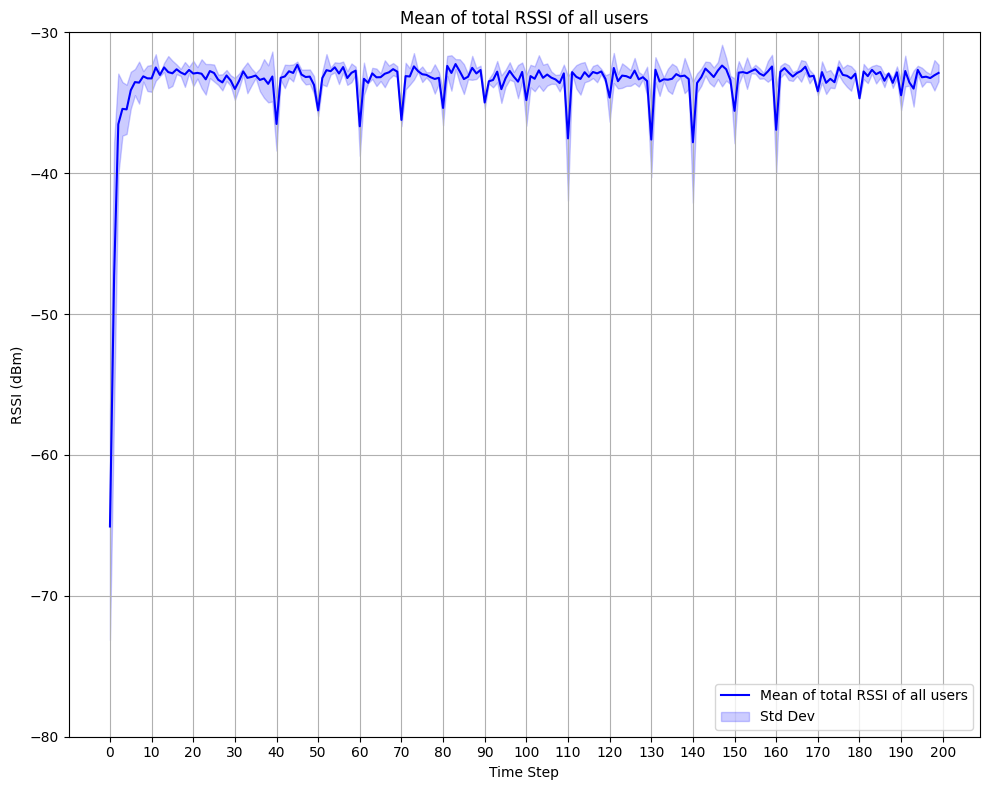

In [ ]:
rfs_sum = 10 ** (rfs / 10)  # Convert dBm to linear scale
rfs_sum = rfs_sum[..., 0].sum(dim=-1)
rfs_sum = 10 * torch.log10(rfs_sum)  # Convert back to dBm
all_rfs_sum = rfs_sum.mean(dim=0)[0]
all_rfs_std = rfs_sum.std(dim=0)[0]
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(all_rfs_sum, label='Mean of total RSSI of all users', color='blue')
ax.fill_between(range(len(all_rfs_sum)), 
                all_rfs_sum - all_rfs_std, 
                all_rfs_sum + all_rfs_std, 
                color='blue', alpha=0.2, label='Std Dev')
ax.set_title('Mean of total RSSI of all users', fontsize=16)
ax.set_xlabel('Time Step',  fontsize=14)
ax.set_ylabel('RSSI (dBm)',  fontsize=14)
ax.legend(loc='lower right')
plt.tight_layout()
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_ylim(-80, -30)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

## Mean RSSI of all users with different seeds

rfs_mean shape: torch.Size([3, 1, 200])
all_rfs_mean shape: torch.Size([200])
all_rfs_std shape: torch.Size([200])


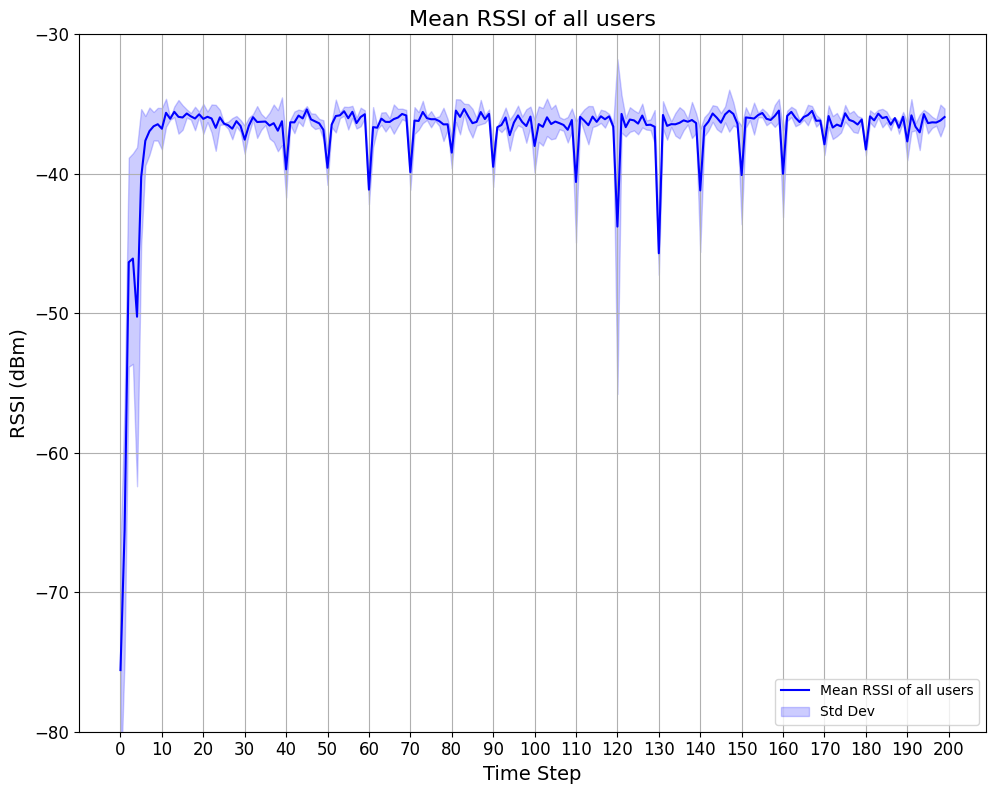

In [41]:
rfs_mean = rfs[..., 0].mean(dim=-1)
# rfs_mean.shape
# rfs_mean = rfs_mean[1:, ...]
print(f"rfs_mean shape: {rfs_mean.shape}")
all_rfs_mean = rfs_mean.mean(dim=0)[0]
all_rfs_std = rfs_mean.std(dim=0)[0]
print(f"all_rfs_mean shape: {all_rfs_mean.shape}")
print(f"all_rfs_std shape: {all_rfs_std.shape}")
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(all_rfs_mean, label='Mean RSSI of all users', color='blue')
ax.fill_between(range(len(all_rfs_mean)), 
                all_rfs_mean - all_rfs_std, 
                all_rfs_mean + all_rfs_std, 
                color='blue', alpha=0.2, label='Std Dev')
ax.set_title('Mean RSSI of all users', fontsize=16)
ax.set_xlabel('Time Step', fontsize=14)
ax.set_ylabel('RSSI (dBm)', fontsize=14)
ax.legend(loc='lower right')
plt.tight_layout()
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.set_ylim(-80, -30)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

## User RSSI for different Scenes

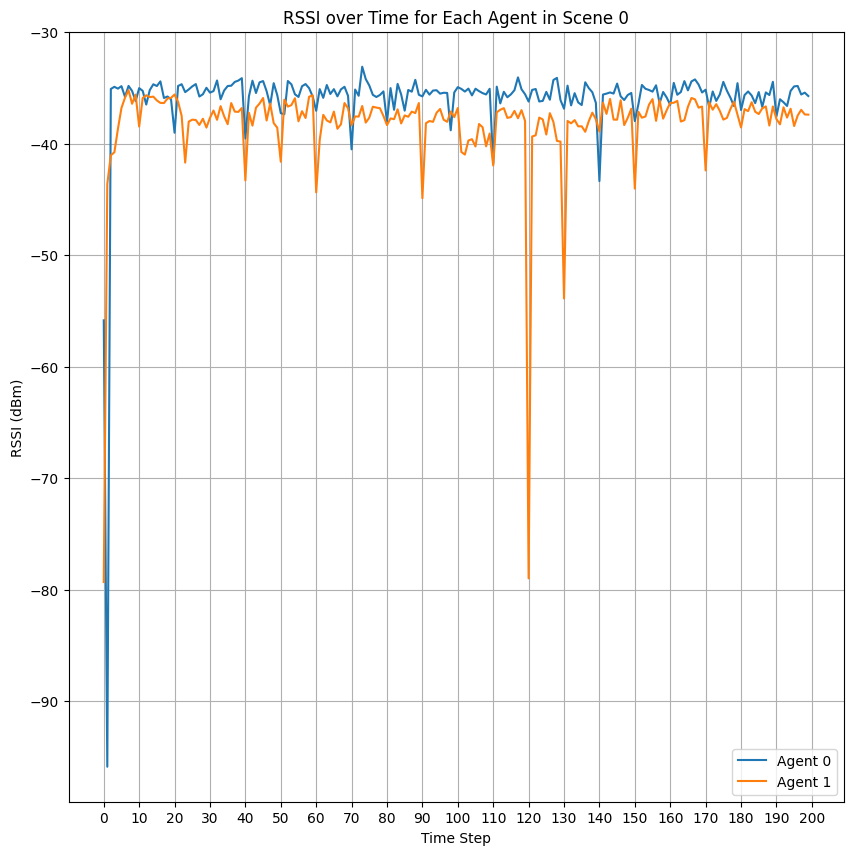

In [38]:
scene0 = rfs[0, 0]
scene0.shape
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(scene0[:, 0, 0].numpy(), label='Agent 0')
ax.plot(scene0[:, 1, 0].numpy(), label='Agent 1')
ax.legend()
ax.set_xlabel('Time Step')
ax.set_ylabel('RSSI (dBm)')
ax.set_title('RSSI over Time for Each Agent in Scene 0')
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()

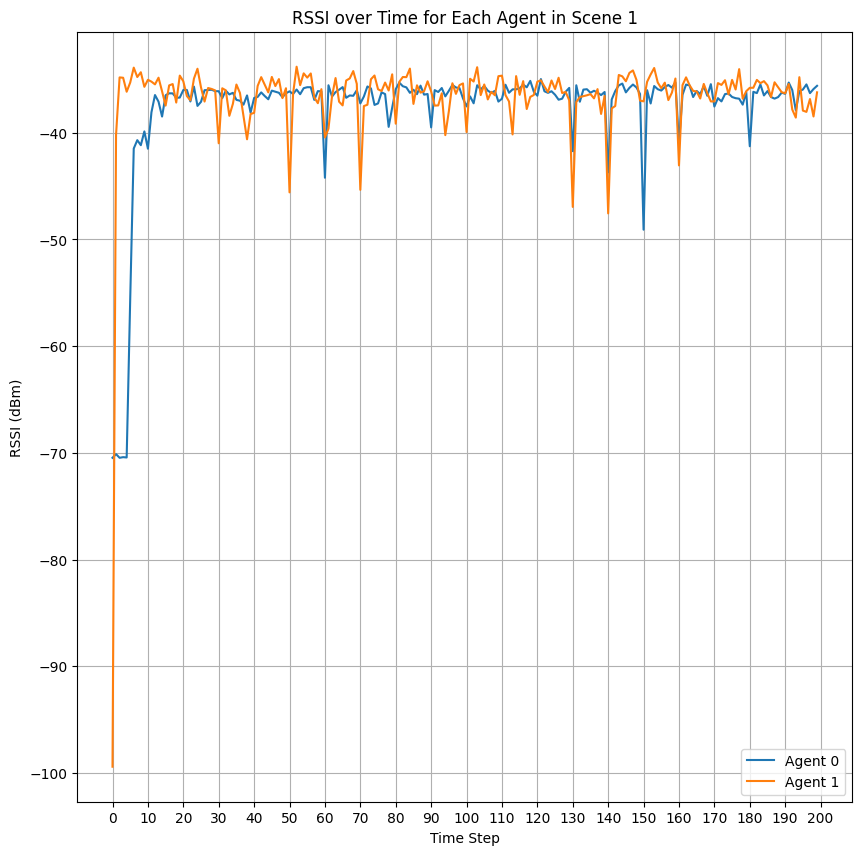

In [39]:
scene1 = rfs[1, 0]
scene1.shape
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(scene1[:, 0, 0].numpy(), label='Agent 0')
ax.plot(scene1[:, 1, 0].numpy(), label='Agent 1')
ax.legend()
ax.set_xlabel('Time Step')
ax.set_ylabel('RSSI (dBm)')
ax.set_title('RSSI over Time for Each Agent in Scene 1')
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()

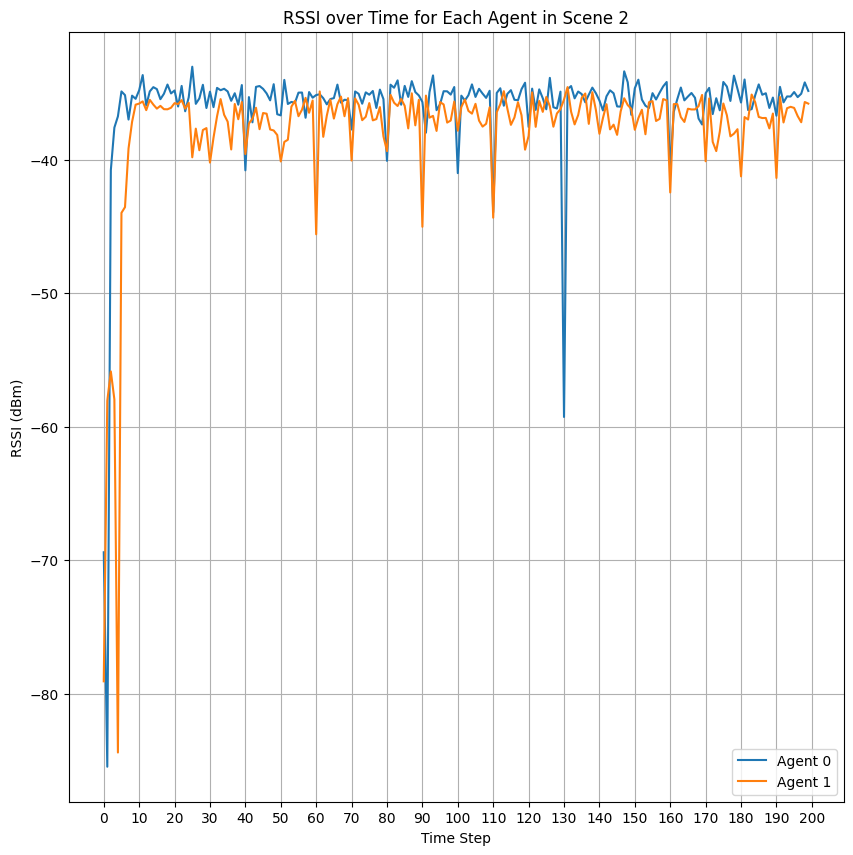

In [40]:
scene2 = rfs[2, 0]
scene2.shape
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(scene2[:, 0, 0].numpy(), label='Agent 0')
ax.plot(scene2[:, 1, 0].numpy(), label='Agent 1')
ax.legend()
ax.set_xlabel('Time Step')
ax.set_ylabel('RSSI (dBm)')
ax.set_title('RSSI over Time for Each Agent in Scene 2')
ax.grid(True)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()